Importing all libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Importing our datasets

In [2]:
data = pd.read_csv('Position_Salaries.csv')
data

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [3]:
X = data.iloc[:,1:-1].values
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [4]:
Y = data.iloc[:,-1].values
Y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000], dtype=int64)

Training the Linear Regression model on the whole dataset

In [5]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, Y)

LinearRegression()

Training the Linear Regression model on the whole dataset

In [6]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=5)
X_poly = poly_reg.fit_transform(X)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, Y)

LinearRegression()

Visualising the Linear Regression results

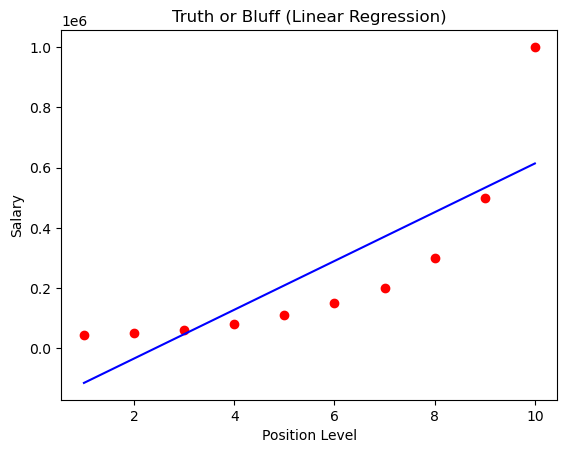

In [7]:
plt.scatter(X, Y, color = 'red')
plt.plot(X, lin_reg.predict(X), color = 'blue')
plt.title('Truth or Bluff (Linear Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

Visualising the Polynomial Regression results

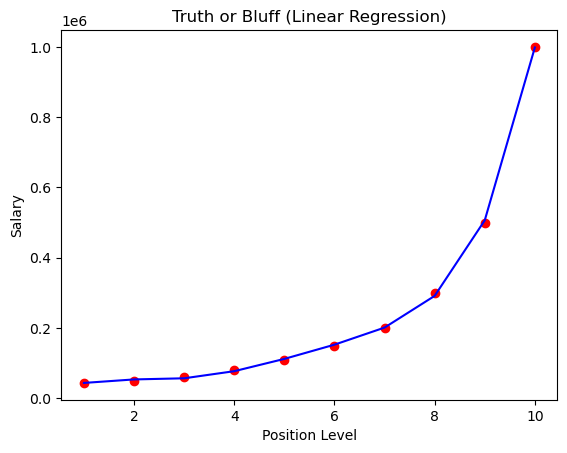

In [8]:
plt.scatter(X, Y, color = 'red')
plt.plot(X, lin_reg_2.predict(poly_reg.fit_transform(X)), color = 'blue')
plt.title('Truth or Bluff (Linear Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

In [9]:
Y_pred = lin_reg_2.predict(poly_reg.fit_transform(X))
Y_pred

array([ 43895.1048956 ,  53836.82983705,  57065.26806523,  77286.71328647,
       112263.40326306, 152736.59673623, 201349.65034936, 291571.09557096,
       506617.71561785, 998377.62237821])

Comparing the data

In [10]:
print(np.concatenate((Y_pred.reshape(len(Y_pred),1), Y.reshape(len(Y),1)),1))

[[  43895.1048956    45000.        ]
 [  53836.82983705   50000.        ]
 [  57065.26806523   60000.        ]
 [  77286.71328647   80000.        ]
 [ 112263.40326306  110000.        ]
 [ 152736.59673623  150000.        ]
 [ 201349.65034936  200000.        ]
 [ 291571.09557096  300000.        ]
 [ 506617.71561785  500000.        ]
 [ 998377.62237821 1000000.        ]]


Checking accuracy 

In [11]:
from sklearn.metrics import r2_score
r2_score(Y,Y_pred)

0.9997969027099755